In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
from utils.classUtils.Feynman import Feynman

In [3]:
x_yy_4h_8j = Feynman('x').decays(
    Feynman('y').decays(
        Feynman('h').decays('j','j'),
        Feynman('h').decays('j','j')
    ),

    Feynman('y').decays(
        Feynman('h').decays('j','j'),
        Feynman('h').decays('j','j')
    ),
)

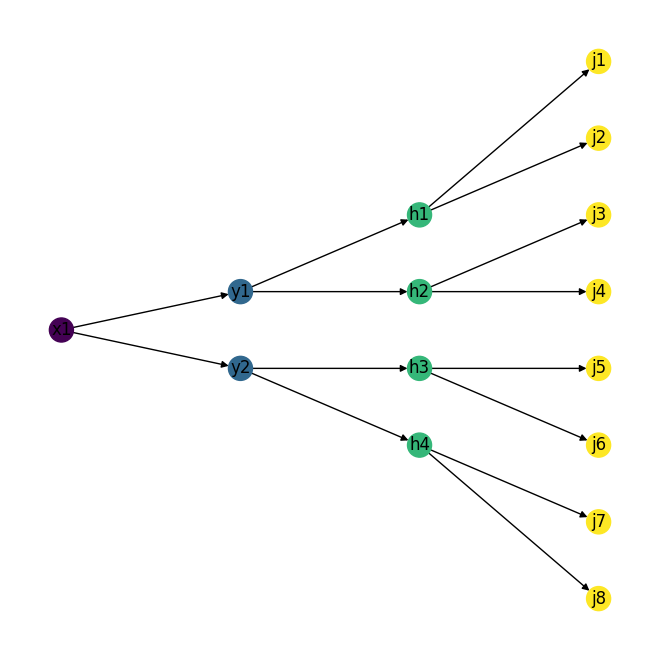

In [4]:
x_yy_4h_8j.draw_diagram()
yy_4h_index = np.array(x_yy_4h_8j.get_finalstate_permutations())

In [5]:
internalstates = x_yy_4h_8j.get_internalstate_types()

In [6]:
internalstates

defaultdict(list, {'h': [h, h, h, h], 'y': [y, y], 'x': [x]})

In [6]:
len(internalstates)

3

In [11]:
x_yh_3h_6b = Feynman('x').decays(
    Feynman('y').decays(
        Feynman('h').decays('j','j'),
        Feynman('h').decays('j','j')
    ),
    Feynman('hx').decays(Feynman('h').decays('j','j'))
)

45

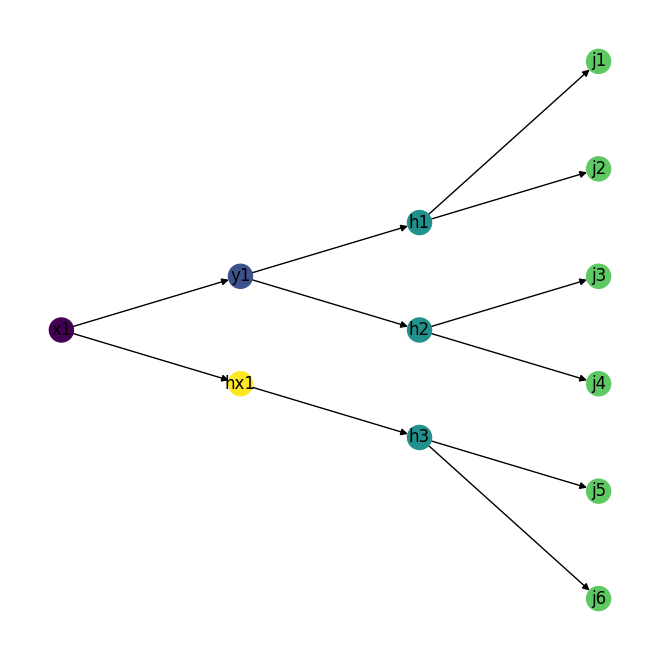

In [12]:
x_yh_3h_6b.draw_diagram()
len(x_yh_3h_6b.get_finalstate_permutations())

In [13]:
internalstates = x_yh_3h_6b.get_internalstate_types()

In [14]:
internalstates

defaultdict(list, {'h': [h, h, h], 'y': [y], 'hx': [hx], 'x': [x]})

In [15]:
njets = 6
jet_features = np.random.rand(512,4, njets)

In [19]:
higgs_index = np.array(internalstates['h'][0].get_finalstate_permutations(nobjs=njets))

In [ ]:
class CompositeCandidateNet:
    def __init__(self, n_in, n_out, aggr='max'):
        self.n_in, self.n_out, self.aggr = n_in, n_out, aggr

    def __call__(self, *child_features):
        assert len(child_features)%2 == 0, "must pass both the features and assigment arrays for each particle type"

        



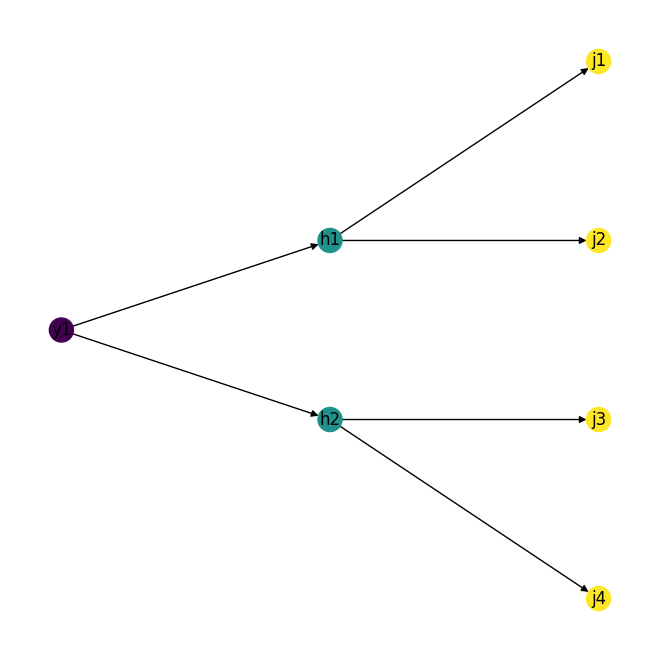

In [55]:
internalstates['y'][0].draw_diagram()

In [18]:
higgs_index = np.array(x_yy_4h_8j.products[0].products[0].get_finalstate_permutations(8))

In [22]:
higgs_index.shape

(28, 2)

In [27]:
y_index = np.array(x_yy_4h_8j.products[0].get_finalstate_permutations(8))

In [30]:
y_index.shape

(210, 4)

In [5]:
x_tt_wb_6j = Feynman('x').decays(
    Feynman('t').decays(
        Feynman('j'),
        Feynman('w').decays('j','j'),
    ),

    Feynman('t').decays(
        Feynman('j'),
        Feynman('w').decays('j','j'),
    ),
)

90

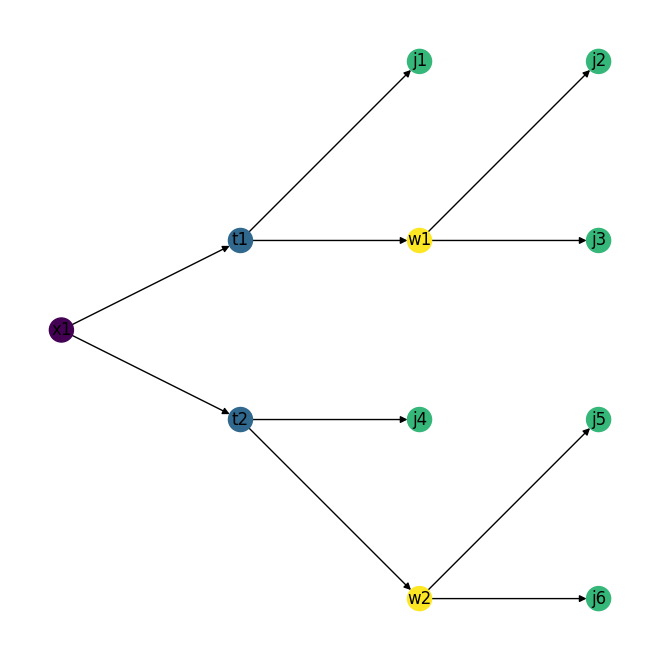

In [6]:
x_tt_wb_6j.draw_diagram()
len(x_tt_wb_6j.get_finalstate_permutations())

In [7]:
x_hh_4b = Feynman('x').decays(
    Feynman('h').decays('j','j'),
    Feynman('h').decays('j','j')
)

3

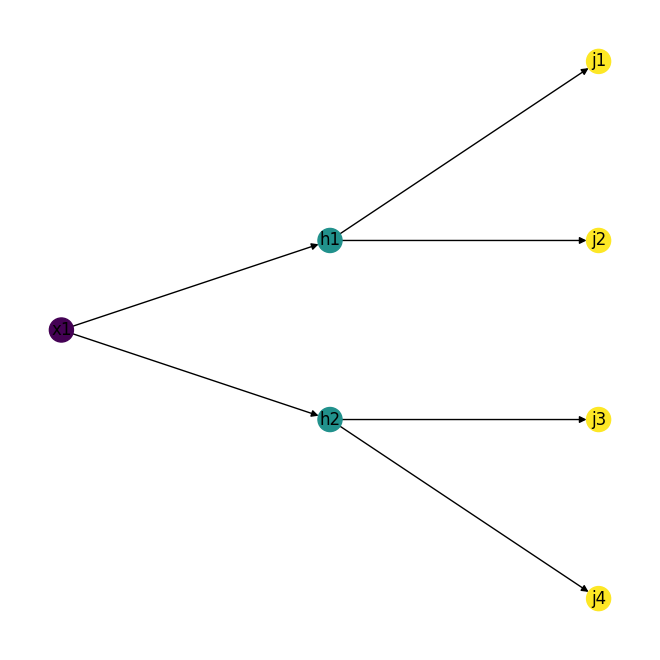

In [8]:
x_hh_4b.draw_diagram()
len(x_hh_4b.get_finalstate_permutations())

In [11]:
bs = np.arange(2)
js = np.arange(3)

In [12]:
from itertools import permutations 

In [13]:
b_combs, j_combs = list(permutations(bs)), list(permutations(js))

In [14]:
import itertools 

In [16]:
x_tt_wb_2b_4j = Feynman('x').decays(
    Feynman('t').decays(
        Feynman('b'),
        Feynman('w').decays('j','j'),
    ),

    Feynman('t').decays(
        Feynman('b'),
        Feynman('w').decays('j','j'),
    ),
)

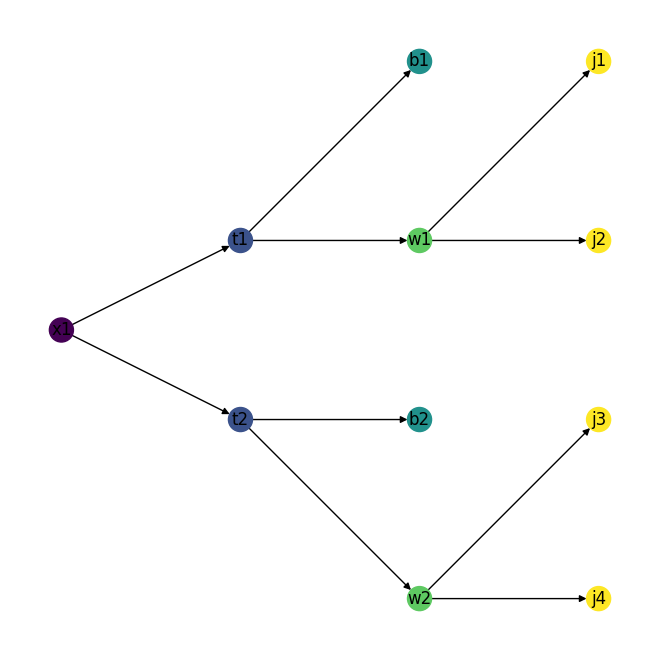

In [17]:
x_tt_wb_2b_4j.draw_diagram()

In [18]:
finalstate = x_tt_wb_2b_4j.get_finalstate()

In [19]:
self = x_tt_wb_2b_4j
nfinalstates = dict(b=2, j=4)

finalstate_types = self.get_finalstate_types()
finalstate_ids = { id:np.arange(max(nobj, len(finalstate_types[id]))) for id, nobj in nfinalstates.items() }

In [20]:
finalstate_permutations = { key:permutations(ids) for key, ids in finalstate_ids.items() }

In [21]:
x_tt_wb_2b_4j.get_reco_id()

-7381383278522438840

In [32]:
combs = x_tt_wb_2b_4j.get_multistate_permutations(b=3, j=4)